
| Nome        | nUSP           | 
| ------------- |:-------------:|
| Pedro Raul Taborga da Costa | 4537076 |
| Flavio de Figueiroa Teixeira Silva | 1127072|


## Tarefas

### 0. Baixar o dataset pelo site ou pelo comando

```kaggle datasets download mlg-ulb/creditcardfraud``` 

# 1. Fazer a leitura do conjunto de dados  escolhido usando  bibliotecas prontas ou funções das linguagens de programação Python ou R, por exemplo a biblioteca Pandas do Python.

In [1]:
import pandas as pd
dtFolder = "../../datasets/"
df = pd.read_csv(dtFolder+"creditcardfraud.zip")
cols = df.columns.tolist()
reord = [cols.pop(0),cols.pop(-2),cols.pop(-1)]
cols = reord + cols
df = df[cols]

## Pré-Rebalanceamento

<AxesSubplot:title={'center':'Tipo de Transações'}>

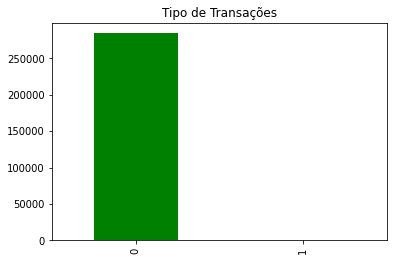

In [5]:
dfRen = df
dfRen["Class"].value_counts().plot(kind="bar", color={"green":"0","red":"1"}, title="Tipo de Transações") #lol

## Após rebalanceamento
Dentre as técnicas de rebalanceamento:

1. under sampling -> random
1. over sampling -> random, SMOTE (synthetic minority oversampling techinique)
1. hibrida -> SMOTE -> TOMEK 

Escolhemos utilizar random oversampling, visto que a perda de dados por undesampling se mostrou grande mais

<AxesSubplot:title={'center':'Tipo de Transações'}>

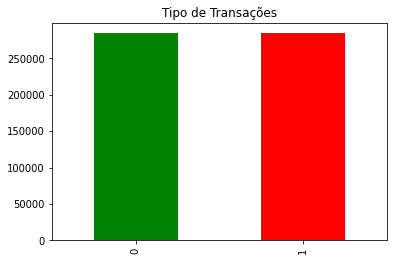

In [6]:
# Armazenando a quantidade de entradas de cada tipo de transação
count_legal, count_fraude = dfRen["Class"].value_counts()

# Separando o dataset em 2 dataframes, cada um contendo só um tipo de transação
df_legal = dfRen[dfRen["Class"] == 0].reset_index()
df_fraude = dfRen[dfRen["Class"] == 1].reset_index()

# Escolhe aleatoriamente o mesmo número que temos em fraudes dentre o total de transações legais
df_fraude_over = df_fraude.sample(count_legal, replace=True)

# Cria e exibe um dataframe a partir da junção dos 2, agora balanceados
df_balanced = pd.concat([df_legal,df_fraude_over], axis=0, ignore_index=True).drop(columns=["index"])
df_balanced["Class"].value_counts().plot(kind="bar",color={"green":"Legal","red":"Fraude"},title="Tipo de Transações")



# 4. Aplicar alguma técnica de normalização nos dados.


In [8]:
# Normalização por MinMaxScaler, onde os valores ficarão entre 0 e 1, que será útil para algoritmos de aprendizado
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df_balanced)
df_norm = pd.DataFrame(df_mm, columns=cols)
df_norm


,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.000000,0.005824,0.0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,...,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697
1,0.000000,0.000105,0.0,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,...,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423
2,0.000006,0.014739,0.0,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,...,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911
3,0.000006,0.004807,0.0,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,...,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371
4,0.000012,0.002724,0.0,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,...,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,0.805113,0.000323,1.0,0.890747,0.754122,0.773169,0.453396,0.792985,0.228759,0.234510,...,0.842080,0.602725,0.578563,0.508287,0.670612,0.360279,0.600951,0.405257,0.432706,0.326671
568626,0.686392,0.004122,1.0,0.844856,0.825601,0.712764,0.521510,0.754702,0.268053,0.237083,...,0.632562,0.568354,0.651162,0.435005,0.679769,0.404295,0.580575,0.501595,0.421652,0.342995
568627,0.236654,0.000030,1.0,0.921929,0.810571,0.681511,0.430505,0.731172,0.221259,0.208333,...,0.797207,0.598638,0.591371,0.502309,0.660385,0.422162,0.654484,0.340671,0.459930,0.336068
568628,0.157525,0.003892,1.0,0.529050,0.918390,0.372598,0.533387,0.640069,0.216294,0.155873,...,0.633195,0.597922,0.590185,0.423201,0.647788,0.403345,0.677160,0.389525,0.442571,0.321539


<AxesSubplot:>

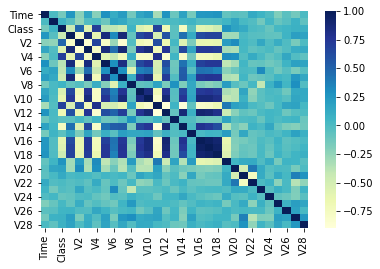

In [9]:
import seaborn as sns
corr_matrix = df_norm.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [10]:
selected = corr_matrix.applymap(lambda x : x > 0.8 and x != 1)
listaVars = []
for c in selected.columns:
    for index,values in selected[c].items():
        if values == True:
            numA = c.split("V")[1]
            numB = index.split("V")[1]
            if numB > numA:
                listaVars.append([numA,numB])
listaVars #Corresponde a dupla de atributos com uma correlação maior que 0.8


[['1', '3'],
 ['1', '5'],
 ['1', '7'],
 ['3', '5'],
 ['3', '7'],
 ['5', '7'],
 ['10', '3'],
 ['10', '7'],
 ['10', '9'],
 ['10', '12'],
 ['10', '16'],
 ['10', '17'],
 ['10', '18'],
 ['12', '14'],
 ['12', '16'],
 ['12', '17'],
 ['12', '18'],
 ['16', '17'],
 ['16', '18'],
 ['17', '18']]

In [153]:
# for atrA,atrB in listaVars:
#     colA = "V"+atrA
#     colB = "V"+atrB
#     df_selectedCol = pd.concat([df_norm[colA],df_norm[colB],df_norm["Class"]],axis=1)    

from sklearn.model_selection import train_test_split

atrA, atrB = listaVars[0]
colA = "V"+atrA
colB = "V"+atrB

df_selectedCol = pd.concat([df_norm[colA],df_norm[colB],df_norm["Class"]],axis=1)
sizeTreino = int(df_selectedCol.shape[0]*0.8)
sizeTeste = int(df_selectedCol.shape[0]*0.2)

treino, teste = train_test_split(df_selectedCol,test_size=0.2)



<AxesSubplot:xlabel='V1', ylabel='V3'>

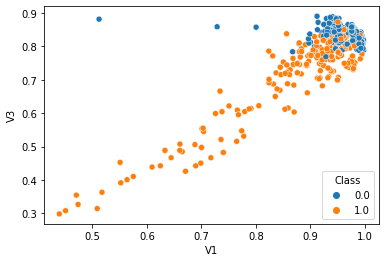

In [169]:
sns.scatterplot(data=treino.iloc[900:1400], x="V1", y="V3", hue="Class")

In [222]:
from math import sqrt


def euclidiana(treino, rowTeste):
    dist = sqrt((treino[0]-rowTeste[0])**2 + (treino[1]-rowTeste[1])**2)
    return [dist,treino[2]]

def manhattan(treino, rowTeste):
    dist = abs((treino[0]-rowTeste[0])) + abs((treino[1]-rowTeste[1]))
    return [dist,treino[2]]
    

In [231]:

def knn(treino: pd.DataFrame,teste: pd.DataFrame,k: list, distancia: str):
    for i, rowTeste in teste.iterrows():
        # Representa a distância entre UMA linha de teste para todos os pontos do treino
        if distancia == "euclidiana":
            dist = treino.apply(euclidiana, axis=1, rowTeste=rowTeste, result_type="expand").rename(columns={0:"Distancia",1:"Class"})
        elif distancia == "manhattan":
            dist = treino.apply(manhattan, axis=1, rowTeste=rowTeste, result_type="expand").rename(columns={0:"Distancia",1:"Class"})
        # Organiza pela menor distancia
        dist.sort_values(by="Distancia",inplace=True)
        # Utilizamos os K valores para classificar a qual grupo o teste pertence
        for numK in k:
            # Pega o número de vizinhos desejado
            topValores = dist.head(numK)
            # Retorna a classificacao baseada no máximo da classificacao dos vizinhos
            classificacao = topValores["Class"].value_counts().idxmax() 
            print(topValores)
        return None
        
        # return dist

explode = knn(treino=treino.iloc[0:500], teste=teste.iloc[0:50],k=[7],distancia="euclidiana")
# series
# series.sort_values(by="Distancia").head(5)


# for i, row in teste.iloc[:2].iterrows():
#     print((row[0]),"\n")
# for index, row in teste.iterrows():
    # print(index,row)



        Distancia  Class
209728   0.002627    0.0
149662   0.010938    0.0
283588   0.015842    0.0
249733   0.016301    0.0
519297   0.016390    1.0
544653   0.017068    1.0
285645   0.017528    1.0


In [125]:
b = teste.iloc[0:2] #:  0:


def par(treino, aaaa):
    return row[0] + row[1] + aaaa

b.apply(par, axis=1, aaaa=99)

484657    100.768406
409771    100.768406
dtype: float64